## Trabajo práctico N1 - Ciencias de datos
Integrantes:
- Albino, Sebastián
- Pacheco Pilan, Federico
- Rodriguez, Alejandro

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_DIRECTORES = "Base Aprender directores 6 primaria 2022 – Muestral.csv"
CSV_ESTUDIANTES = "Base Aprender estudiantes 6 primaria 2022 – Muestral L y M.csv"

VALOR_BLANCO_INT = -9
VALOR_MULTIMARCA_INT = -6
VALOR_NODISP_INT = -8

COD_JURISDICCION = {
    2: "Ciudad Autónoma de Buenos Aires",
    6: "Buenos Aires",
    10: "Catamarca",
    14:	"Córdoba",
    18:	"Corrientes",
    22:	"Chaco",
    26:	"Chubut",
    30:	"Entre Ríos",
    34:	"Formosa",
    38:	"Jujuy",
    42:	"La Pampa",
    46:	"La Rioja",
    50:	"Mendoza",
    54:	"Misiones",
    58:	"Neuquén",
    62:	"Río Negro",
    66:	"Salta",
    70:	"San Juan",
    74:	"San Luis",
    78:	"Santa Cruz",
    82:	"Santa Fe",
    86:	"Santiago del Estero",
    90:	"Tucumán",
    94:	"Tierra del Fuego, Antártida e Islas del Atlántico Sur"
}

df_directores = pd.read_csv("dataset/" + CSV_DIRECTORES, sep=";")
df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")

/tmp/ipykernel_28259/3122024671.py:39: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")


In [3]:
df_directores.head()

,ID1,c_jurisdiccion,anio,sector,ambito,dp01,dp02d,dp02u,Edad,dp03a,...,dp44b,dp44c,dp44d,dp44e,dp45a,dp45b,dp45c,dp45d,ponder,region
0,840066020084006,42,6,1,2,2,5,2,52,0,...,0,0,1,0,1,-9,-9,-9,"1,25",SUR
1,135720020280781,26,6,1,1,1,4,1,41,0,...,-9,-9,-9,-9,1,1,1,1,"1,5073273",SUR
2,259600127602225,58,6,1,2,2,5,0,50,0,...,0,0,0,1,-9,-9,2,-9,"5,4848485",SUR
3,957008580009570,26,6,1,1,2,5,8,58,0,...,0,0,0,1,1,-9,1,1,"1,5073273",SUR
4,221001326000221,78,6,1,1,2,4,6,46,0,...,1,1,1,0,2,2,3,2,"1,3846154",SUR


In [4]:
df_estudiantes.head()

,jurisdiccion,ID1,seccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,lpuntaje,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp
0,2,396970010637139,2,22,2,2,,,,,...,"497,61646","395,31659",,,,,,,,
1,2,396970010637139,2,18,2,2,,,,,...,"440,10049","414,74878",,,,,,,,
2,2,396970010637139,1,18,2,2,,,,,...,"608,22382","549,40967",,,,,,,,
3,2,971700824929717,2,10,1,2,,,,,...,"582,31982","526,39301",,,,,,,,
4,2,971700824929717,1,23,1,2,,,,,...,"381,68524","418,19516",,,,,,,,


#### 0. Métodos útiles

In [5]:
# Transforma los registros de la serie entregada como parametro a numeros enteros y elimina los registros con " " (espacio), ‘Blanco’, ‘Multimarca’ y 'No disponible'  
# Ej serie: df_estudiantes["ap12d"], df_estudiantes["ap01"]
def limpiar_col(serie):
    # Filtro para string vacio
    filtro_vacio = serie != " "
    # Eliminamos registros vacios (" ")
    new_serie = serie[filtro_vacio]

    # Pasamos a int los valores de la columna
    new_serie = new_serie.astype(int)

    # Filtro para valores en Blanco, Multimarca o No disponoible
    filtro_blanco_int = new_serie != VALOR_BLANCO_INT
    filtro_multimarca_int = new_serie != VALOR_MULTIMARCA_INT
    filtro_nodisp_int = new_serie != VALOR_NODISP_INT

    # Eliminamos los registros con valores en ‘Blanco’, ‘Multimarca’ o 'No disponible'.
    new_serie = new_serie[filtro_blanco_int & 
                          filtro_multimarca_int & 
                          filtro_nodisp_int 
                         ]
    
    return new_serie


#### 1. Proporción muestras con y sin acceso a internet.

In [6]:
estudiantes_internet = limpiar_col(df_estudiantes["ap12d"])
estudiantes_internet.value_counts()

ap12d
1    108171
2      9731
Name: count, dtype: int64

/tmp/ipykernel_28259/1748033283.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


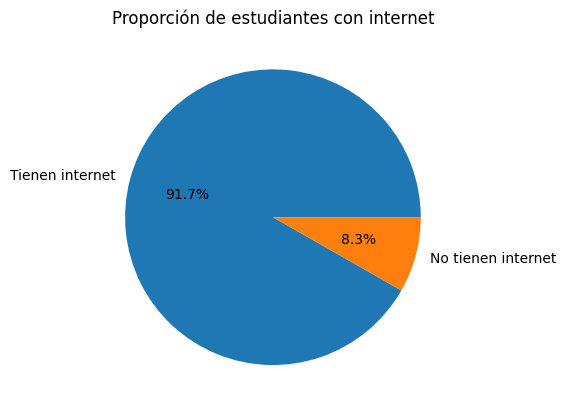

In [7]:
# Graficar proporcion de los que tienen internet y los que no
fig, ax = plt.subplots()

labels = ["Tienen internet", "No tienen internet"]
ax.pie(estudiantes_internet.value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes con internet")

fig.show()

#### 2. Porcentaje de estudiantes mayores de 13 años

In [8]:
estudiantes_edad = limpiar_col(df_estudiantes["ap01"])
#estudiantes_edad.value_counts()
estudiantes_edad = estudiantes_edad == 5


/tmp/ipykernel_28259/3099174016.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


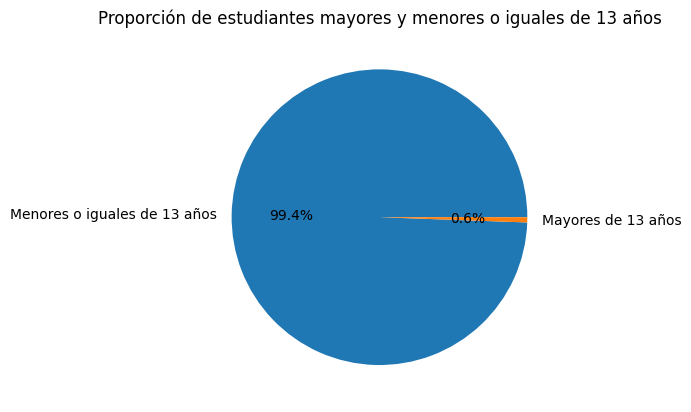

In [9]:
# Graficar proporcion de los estudiantess que son mayores de 13 y no lo son
fig, ax = plt.subplots()

labels = ["Menores o iguales de 13 años", "Mayores de 13 años"]
ax.pie(estudiantes_edad.value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes mayores y menores o iguales de 13 años")

fig.show()

#### 3. Proporción de muestras de las 10 jurisdicciones con mayor cantidad de estudiantes.

In [10]:

#df_estudiantes["jurisdiccion"].unique()

# Agrupar los registros por jurisdiccion, contar la cantidad de registros de cada una, ordenar los valores por la columna idalumno (aunque podrian usarse otros atributos), y quedarse con los 10 primeros
cant_jurisdicciones = 10
juridiscciones_con_mas_estudiantes = df_estudiantes.groupby("jurisdiccion").count().sort_values("idalumno", ascending = False).iloc[:cant_jurisdicciones]
# Agregar un nuevo indice para que jurisdiccion no se utilizado como indice
juridiscciones_con_mas_estudiantes.reset_index(inplace = True)


total_alumnos = juridiscciones_con_mas_estudiantes["idalumno"].sum()
juridiscciones_con_mas_estudiantes["proporcion_alumnos"] = juridiscciones_con_mas_estudiantes["idalumno"].apply(lambda c: c / total_alumnos * 100)


#print(juridiscciones_con_mas_estudiantes)
#print(labels)


/tmp/ipykernel_28259/1022150650.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  juridiscciones_con_mas_estudiantes.reset_index(inplace = True)
/tmp/ipykernel_28259/1022150650.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  juridiscciones_con_mas_estudiantes["proporcion_alumnos"] = juridiscciones_con_mas_estudiantes["idalumno"].apply(lambda c: c / total_alumnos * 100)


/tmp/ipykernel_28259/1975688238.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0    22535
1     7467
2     7382
3     6370
4     5767
5     5696
6     5594
7     5376
8     5172
9     5034
Name: idalumno, dtype: int64


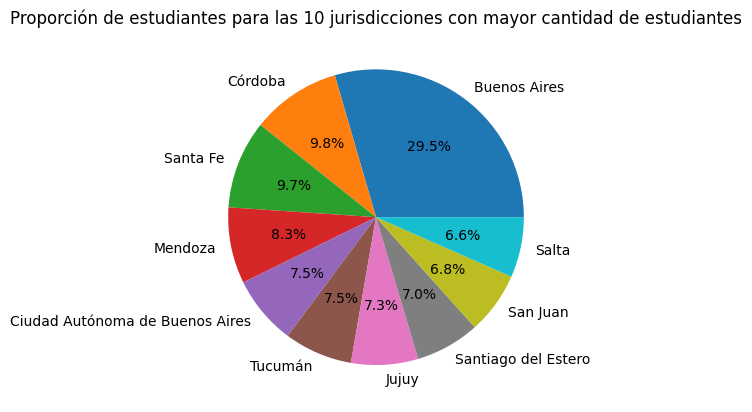

In [11]:
fig, ax = plt.subplots()

print(juridiscciones_con_mas_estudiantes["idalumno"])

# Obtener los nombres de los codigos de jurisdiccion
jurisdicciones = [COD_JURISDICCION[j] for j in juridiscciones_con_mas_estudiantes["jurisdiccion"]]

ax.pie(juridiscciones_con_mas_estudiantes["proporcion_alumnos"], labels=jurisdicciones, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes para las 10 jurisdicciones con mayor cantidad de estudiantes")

fig.show()


#### Proporción de muestras con residencia rural y urbana

(128482, 117)
(3696, 170)
(132178, 283)


/tmp/ipykernel_28259/1085143737.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


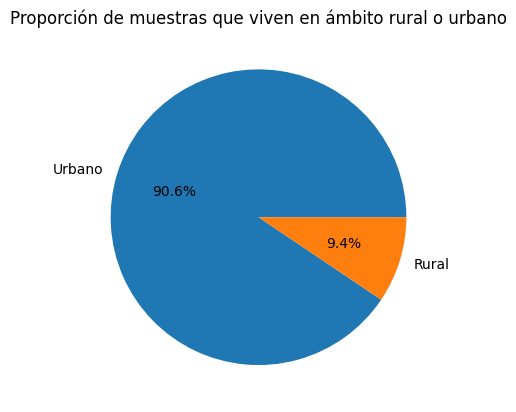

In [15]:
# df_estudiantes['ambito'].unique()

# Graficar proporcion de los estudiantes que viven en ambito rural o urbano

df_unido = pd.concat([df_estudiantes, df_directores])

"""
print(df_estudiantes.shape)
print(df_directores.shape)
print(df_unido.shape)
"""

fig, ax = plt.subplots()

labels = ["Urbano", "Rural"]
ax.pie(df_unido['ambito'].value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de muestras que viven en ámbito rural o urbano")

fig.show()
